## case study for fligh prediction model
- you will have a dataset 
- find the cheapest ans expensive flight at apsecific point 
- Go through EDA 
- and ML model
- and find a sweet 


## EDA

In [ ]:
# import linrarihes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# laod datset
x_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('Y_train.csv')
x_test = pd.read_csv('X_test.csv')

In [ ]:
# shape
x_train.shape


(21776590, 11)

In [ ]:
# check data
x_train.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,0,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,0.0,0,c-2
1,1,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,32.0,1,c-2
2,2,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,1,c-4
3,3,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,2,c-4
4,4,2020-12-31 09:46:18.191119+00:00,x,y,2021-01-25 11:00:00+00:00,2021-01-25 12:55:00+00:00,beta,False,20.0,0,b-69


In [ ]:
y_train.head()

,Unnamed: 0,target
0,0,7400.0
1,1,8650.0
2,2,9150.0
3,3,10400.0
4,4,8697.0


In [ ]:
# i will take sample out of this data
# merge datasets to make one
df=pd.concat([x_train,y_train], axis=1) # horzintal stack
df.sample(15)

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0,target
11787365,11787365,2021-06-29 09:51:30.051510+00:00,x,y,2021-07-17 16:00:00+00:00,2021-07-17 18:00:00+00:00,alpha,True,35.0,1,a-23,11787365,11072.0
779240,779240,2021-01-23 08:02:33.142849+00:00,x,y,2021-02-08 17:00:00+00:00,2021-02-08 18:59:00+00:00,gamma,True,32.0,1,c-6,779240,9150.0
20236900,20236900,2021-08-20 20:48:09.356567+00:00,x,y,2021-08-30 07:00:00+00:00,2021-08-30 09:00:00+00:00,alpha,True,15.0,1,a-5,20236900,9045.0
13350647,13350647,2021-07-07 15:48:19.546396+00:00,x,y,2021-08-05 14:00:00+00:00,2021-08-05 16:00:00+00:00,gamma,True,20.0,2,c-4,13350647,11900.0
2923370,2923370,2021-03-09 18:15:04.789976+00:00,x,y,2021-03-11 11:00:00+00:00,2021-03-11 13:00:00+00:00,gamma,True,20.0,2,c-4,2923370,9895.0
19036516,19036516,2021-08-14 09:15:59.781153+00:00,x,y,2021-08-15 11:00:00+00:00,2021-08-15 13:00:00+00:00,gamma,True,20.0,2,c-4,19036516,13050.0
12346542,12346542,2021-07-02 12:53:24.780251+00:00,x,y,2021-10-10 10:00:00+00:00,2021-10-10 12:00:00+00:00,alpha,True,15.0,1,a-7,12346542,6524.0
125068,125068,2021-01-04 03:32:54.671077+00:00,x,y,2021-02-14 11:00:00+00:00,2021-02-14 13:00:00+00:00,gamma,True,32.0,2,c-4,125068,10400.0
12028641,12028641,2021-06-30 17:11:06.581512+00:00,x,y,2021-07-14 14:00:00+00:00,2021-07-14 15:55:00+00:00,beta,True,40.0,0,b-9,12028641,8055.0
6930129,6930129,2021-05-16 12:57:28.318483+00:00,x,y,2021-06-01 17:00:00+00:00,2021-06-01 18:59:00+00:00,gamma,True,20.0,2,c-6,6930129,10655.0


## Assignment no:1 effect of axis =0
- agar hum axis 0 lai tou phir y_train ki sari values x_train
- ka end kai baad insert hongi jis se dataset kharab hoga

In [ ]:
## Assignment no 1:
## axis zero sai kia problem karni hai
x_train_sample=x_train.sample(100000)
y_train_sample=y_train.sample(100000)
df1=pd.concat([x_train_sample,y_train_sample], axis=0) # horzintal stack


In [ ]:
df1.tail(1000)

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,target
3688948,3688948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8957.0
17201506,17201506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13450.0
1436459,1436459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9799.0
15655294,15655294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9280.0
12912253,12912253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10285.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20392486,20392486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6870.0
13532577,13532577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12945.0
8054331,8054331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7520.0
13613269,13613269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12945.0


In [ ]:
df.shape

(21776590, 13)

In [ ]:
df=df.sample(5000)

In [ ]:
df.shape

(5000, 13)

In [ ]:
# saving a csv file 
df.to_csv('apna_sasta_ticket.csv')

In [ ]:
# saving testinf file to csv
x_test.sample(250).to_csv('sasta_ticket_test.csv')

In [ ]:
df_test = pd.read_csv('sasta_ticket_test.csv')
df_test.head()
# this will give sir a chance to look your assignment

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,719842,2021-09-05 15:41:07.145057+00:00,x,y,2021-09-07 11:00:00+00:00,2021-09-07 12:55:00+00:00,beta,True,40.0,0,b-69
1,4210567,2021-09-27 08:20:28.914001+00:00,x,y,2021-10-08 16:00:00+00:00,2021-10-08 18:00:00+00:00,alpha,True,20.0,1,a-23
2,2339206,2021-09-14 12:16:26.319441+00:00,x,y,2021-09-22 13:00:00+00:00,2021-09-22 15:00:00+00:00,alpha,True,15.0,1,a-9
3,1484756,2021-09-09 17:06:26.687297+00:00,x,y,2021-10-20 16:00:00+00:00,2021-10-20 18:00:00+00:00,alpha,True,15.0,1,a-23
4,4250638,2021-09-27 13:50:33.999188+00:00,x,y,2021-10-02 10:00:00+00:00,2021-10-02 12:00:00+00:00,alpha,True,20.0,1,a-7


In [ ]:
# now EDA analysis properly
print('columns, Rows',df.shape)


columns, Rows (5000, 13)


In [ ]:
# structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 18869847 to 12549469
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5000 non-null   int64  
 1   f1          5000 non-null   object 
 2   f2          5000 non-null   object 
 3   f3          5000 non-null   object 
 4   f4          5000 non-null   object 
 5   f5          5000 non-null   object 
 6   f6          5000 non-null   object 
 7   f7          5000 non-null   bool   
 8   f8          5000 non-null   float64
 9   f9          5000 non-null   int64  
 10  f10         5000 non-null   object 
 11  Unnamed: 0  5000 non-null   int64  
 12  target      5000 non-null   float64
dtypes: bool(1), float64(2), int64(3), object(7)
memory usage: 512.7+ KB


In [ ]:
# check null values
df.isnull().sum()

Unnamed: 0    0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
Unnamed: 0    0
target        0
dtype: int64

In [ ]:
# summary statsitics
df.describe()

,Unnamed: 0,f8,f9,Unnamed: 0,target
count,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,1.094860e+07,22.725600,0.937800,1.094860e+07,10192.362000
std,6.337039e+06,8.952784,0.599002,6.337039e+06,3510.659656
min,1.746000e+03,0.000000,0.000000,1.746000e+03,4990.000000
25%,5.483865e+06,20.000000,1.000000,5.483865e+06,7796.000000
50%,1.104169e+07,20.000000,1.000000,1.104169e+07,9403.000000
75%,1.641470e+07,32.000000,1.000000,1.641470e+07,11245.000000
max,2.177586e+07,45.000000,2.000000,2.177586e+07,33720.000000


In [ ]:
df.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0,target
18869847,18869847,2021-08-13 11:34:13.347640+00:00,x,y,2021-08-19 04:00:00+00:00,2021-08-19 06:00:00+00:00,alpha,True,15.0,1,a-1,18869847,9045.0
5898472,5898472,2021-04-30 21:19:29.619243+00:00,x,y,2021-05-06 05:00:00+00:00,2021-05-06 07:00:00+00:00,gamma,True,0.0,0,c-2,5898472,7315.0
3383270,3383270,2021-03-16 17:17:43.325570+00:00,x,y,2021-03-17 11:00:00+00:00,2021-03-17 12:55:00+00:00,beta,True,20.0,0,b-69,3383270,9030.0
10277378,10277378,2021-06-18 03:06:06.750353+00:00,x,y,2021-07-11 14:00:00+00:00,2021-07-11 16:00:00+00:00,gamma,True,20.0,2,c-4,10277378,7620.0
11586690,11586690,2021-06-28 06:26:00.302863+00:00,x,y,2021-07-01 14:00:00+00:00,2021-07-01 15:55:00+00:00,beta,True,40.0,0,b-9,11586690,12726.0


In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'Unnamed: 0', 'target'],
      dtype='object')


In [ ]:
# ab categorical columns ki alag list
# aur numerical column ki alaida list
#df.f2.unique()
#finding unique values in categorical list
# cat list ko abhi f1 , f2 ka pata nai ke yai
cat_list = ['f2','f3','f6','f8','f9','f10']

# unique values in each columns 
for i in cat_list:
    print(i, df[i].unique())
    print('...................................')

f2 ['x']
...................................
f3 ['y']
...................................
f6 ['alpha' 'gamma' 'beta' 'omega']
...................................
f8 [15.  0. 20. 40. 35. 32. 45.]
...................................
f9 [1 0 2]
...................................
f10 ['a-1' 'c-2' 'b-69' 'c-4' 'b-9' 'a-5' 'c-6' 'd-3' 'a-9' 'a-23' 'b-67'
 'a-7' 'd-5' 'b-1' 'b-19' 'd-1' 'b-73' 'b-369']
...................................


In [ ]:
# we will remove f2,f3,f10 b/c hum jo prediction chalte hai woh time, baggage aue airline ki base par hai
df.drop(['Unnamed: 0','f2','f3','f10'], axis=1, inplace=True)

In [ ]:
df.head()

,f1,f4,f5,f6,f7,f8,f9,target
18869847,2021-08-13 11:34:13.347640+00:00,2021-08-19 04:00:00+00:00,2021-08-19 06:00:00+00:00,alpha,True,15.0,1,9045.0
5898472,2021-04-30 21:19:29.619243+00:00,2021-05-06 05:00:00+00:00,2021-05-06 07:00:00+00:00,gamma,True,0.0,0,7315.0
3383270,2021-03-16 17:17:43.325570+00:00,2021-03-17 11:00:00+00:00,2021-03-17 12:55:00+00:00,beta,True,20.0,0,9030.0
10277378,2021-06-18 03:06:06.750353+00:00,2021-07-11 14:00:00+00:00,2021-07-11 16:00:00+00:00,gamma,True,20.0,2,7620.0
11586690,2021-06-28 06:26:00.302863+00:00,2021-07-01 14:00:00+00:00,2021-07-01 15:55:00+00:00,beta,True,40.0,0,12726.0


In [ ]:
# hum f1 aur f4 ko apas mai minus kare gai
# ticket date n time vs departure date n time
# so typecasting
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 18869847 to 12549469
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      5000 non-null   object 
 1   f4      5000 non-null   object 
 2   f5      5000 non-null   object 
 3   f6      5000 non-null   object 
 4   f7      5000 non-null   bool   
 5   f8      5000 non-null   float64
 6   f9      5000 non-null   int64  
 7   target  5000 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 317.4+ KB


In [ ]:
# f1,4,5 all are objects
# so we will convert them into date time

from datetime import date, datetime

df.f1= pd.to_datetime(df.f1)
df.f4= pd.to_datetime(df.f4)
df.f5= pd.to_datetime(df.f5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 18869847 to 12549469
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   f1      5000 non-null   datetime64[ns, UTC]
 1   f4      5000 non-null   datetime64[ns, UTC]
 2   f5      5000 non-null   datetime64[ns, UTC]
 3   f6      5000 non-null   object             
 4   f7      5000 non-null   bool               
 5   f8      5000 non-null   float64            
 6   f9      5000 non-null   int64              
 7   target  5000 non-null   float64            
dtypes: bool(1), datetime64[ns, UTC](3), float64(2), int64(1), object(1)
memory usage: 317.4+ KB


In [ ]:
# adding column after subtraction
# by subtracting f1-f4: departure time
df.insert(0, 'time_to_depart[s]', ((df.f4-df.f1).astype('timedelta64[s]')),True)
df.insert(1, 'time_travel[s]', ((df.f5-df.f4).astype('timedelta64[s]')),True)

In [ ]:
df.head()

,time_to_depart[s],time_travel[s],f1,f4,f5,f6,f7,f8,f9,target
18869847,491146.0,7200.0,2021-08-13 11:34:13.347640+00:00,2021-08-19 04:00:00+00:00,2021-08-19 06:00:00+00:00,alpha,True,15.0,1,9045.0
5898472,459630.0,7200.0,2021-04-30 21:19:29.619243+00:00,2021-05-06 05:00:00+00:00,2021-05-06 07:00:00+00:00,gamma,True,0.0,0,7315.0
3383270,63736.0,6900.0,2021-03-16 17:17:43.325570+00:00,2021-03-17 11:00:00+00:00,2021-03-17 12:55:00+00:00,beta,True,20.0,0,9030.0
10277378,2026433.0,7200.0,2021-06-18 03:06:06.750353+00:00,2021-07-11 14:00:00+00:00,2021-07-11 16:00:00+00:00,gamma,True,20.0,2,7620.0
11586690,286439.0,6900.0,2021-06-28 06:26:00.302863+00:00,2021-07-01 14:00:00+00:00,2021-07-01 15:55:00+00:00,beta,True,40.0,0,12726.0


In [ ]:
df.isnull().sum()

time_to_depart[s]    0
time_travel[s]       0
f1                   0
f4                   0
f5                   0
f6                   0
f7                   0
f8                   0
f9                   0
target               0
dtype: int64

In [ ]:
# to renmae column
#df=df.rename(columns={'f12':'f1'})
df.head()

NameError: name 'df' is not defined

In [ ]:
cat_col = ['f6','f7','f8','f9']
num_col = ['time_to_depart[s]','time_travel[s]']

C:\Users\CU-43\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CU-43\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CU-43\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: Fu

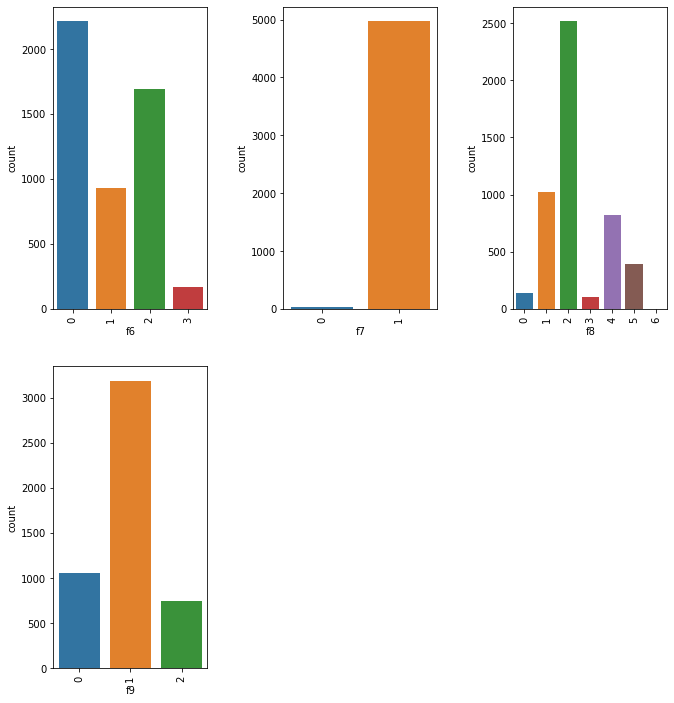

In [ ]:
# ploting 
c= 1
plt.figure(figsize=(10,30))
for i in cat_col:
    plt.subplot(6,3,c)
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c= c+1 
plt.show()

C:\Users\CU-43\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CU-43\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


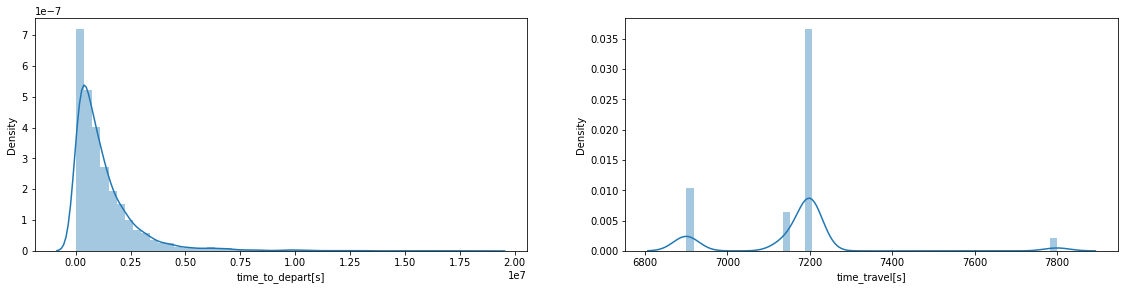

In [ ]:
# Numercial data ploting 

c= 1
plt.figure(figsize=(30,30))
for i in num_col:
    plt.subplot(6,3,c)
    sns.distplot(df[i]) 
    c= c+1 
plt.show()

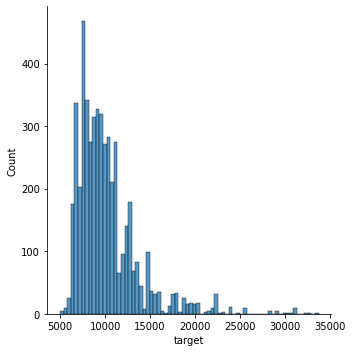

In [ ]:
# target
sns.displot(df.target)

 

C:\Users\CU-43\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target'>

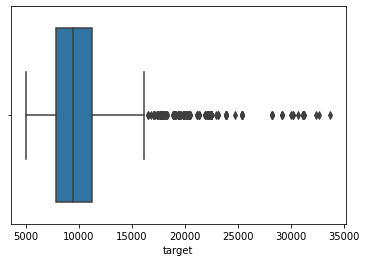

In [ ]:
sns.boxplot(df.target)

In [ ]:
# outliner removal # task

In [ ]:
# skewness and kurtosis
df.skew()
df.kurtosis()
#the remove outliers

C:\Users\CU-43\AppData\Local\Temp\ipykernel_15808\441665812.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()
C:\Users\CU-43\AppData\Local\Temp\ipykernel_15808\441665812.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


time_to_depart[s]     21.411273
time_travel[s]         5.462886
f7                   187.501568
f8                    -0.045422
f9                    -0.236567
target                 7.264587
dtype: float64

In [ ]:
# encoding of varables
df.drop(['f1','f4','f5'],axis=1,inplace=True)

In [ ]:
df.head()

,time_to_depart[s],time_travel[s],f6,f7,f8,f9,target
18869847,491146.0,7200.0,0,1,1,1,9045.0
5898472,459630.0,7200.0,2,1,0,0,7315.0
3383270,63736.0,6900.0,1,1,2,0,9030.0
10277378,2026433.0,7200.0,2,1,2,2,7620.0
11586690,286439.0,6900.0,1,1,5,0,12726.0


In [ ]:
# hot encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

 

In [ ]:
# apply label encoder
df['f6'] = le.fit_transform(df['f6'])
df['f7'] = le.fit_transform(df['f7'])
df['f8'] = le.fit_transform(df['f8'])

In [ ]:
df.sample(10)

,time_to_depart[s],time_travel[s],f6,f7,f8,f9,target
11402275,51229.0,7200.0,0,1,4,1,17792.0
3680057,608383.0,7200.0,0,1,4,1,10799.0
6867711,6347606.0,7200.0,2,1,2,2,10655.0
20744864,5299698.0,7140.0,2,1,2,1,6870.0
2082625,1841554.0,7800.0,0,1,1,1,12495.0
13393192,287879.0,7200.0,0,1,4,1,14645.0
16690034,77083.0,7140.0,2,1,2,2,13560.0
1861577,103166.0,7140.0,2,1,2,1,12500.0
18306730,744572.0,6900.0,1,1,5,0,11200.0
1563142,1413653.0,6900.0,1,1,4,0,9522.0


In [ ]:
df.describe()

,time_to_depart[s],time_travel[s],f6,f7,f8,f9,target
count,5.000000e+03,5000.00000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000
mean,1.289651e+06,7159.54800,0.96180,0.99480,2.327000,0.937800,10192.362000
std,1.568152e+06,170.69207,0.95547,0.07193,1.264433,0.599002,3510.659656
min,1.203000e+03,6900.00000,0.00000,0.00000,0.000000,0.000000,4990.000000
25%,3.444202e+05,7140.00000,0.00000,1.00000,2.000000,1.000000,7796.000000
50%,8.324210e+05,7200.00000,1.00000,1.00000,2.000000,1.000000,9403.000000
75%,1.637686e+06,7200.00000,2.00000,1.00000,3.000000,1.000000,11245.000000
max,1.868332e+07,7800.00000,3.00000,1.00000,6.000000,2.000000,33720.000000


## Assignment 2: effect of scaling on data
- scaling sai hamara data -1 se 1 kai darmian scale hogaya hai
- comparsion karna asan ho gaya hai

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# it is sklearn function to scale a data / or normalize 
# data ko normalize karna hai ya nai yai hum par chor diya ha sir nai
# how to do it
# hum nai scalar lagana hota hai numerical varibles mai
df['time_to_depart[s]']=sc.fit_transform(df[['time_to_depart[s]']])
df['time_travel[s]']=sc.fit_transform(df[['time_travel[s]']])
df['target']=sc.fit_transform(df[['target']])
# 1:05:~


In [ ]:
df.sample(10)

,time_to_depart[s],time_travel[s],f6,f7,f8,f9,target
6800786,1.735649,-1.520715,1,1,2,0,-0.982353
20795334,-0.779342,0.237012,2,1,2,2,3.685613
19306252,1.076489,-1.520715,1,1,2,0,-1.031921
118478,1.956130,3.752465,0,1,0,0,-0.414027
9870952,0.100862,0.237012,2,1,2,1,-0.937912
17717461,-0.768096,0.237012,0,1,2,1,0.698696
11945018,-0.158126,0.237012,0,1,1,1,-0.653037
4246482,1.387761,0.237012,0,1,4,1,0.172816
8216114,0.563203,0.237012,2,1,2,2,0.486464
767708,-0.526109,-1.520715,1,1,5,0,-0.089554


C:\Users\CU-43\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CU-43\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


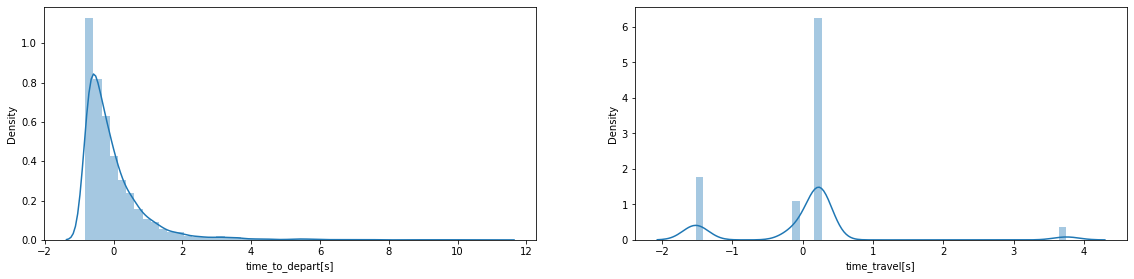

In [ ]:
# Numercial data ploting 

c= 1
plt.figure(figsize=(30,30))
for i in num_col:
    plt.subplot(6,3,c)
    sns.distplot(df[i]) 
    c= c+1 
plt.show()

In [ ]:
df.columns

Index(['time_to_depart[s]', 'time_travel[s]', 'f6', 'f7', 'f8', 'f9',
       'target'],
      dtype='object')

In [ ]:
# spllitng our data in x an y
x=df.drop(['target'],axis=1)
y=df.target

In [ ]:
x.head()

,time_to_depart[s],time_travel[s],f6,f7,f8,f9
18869847,-0.509252,0.237012,0,1,1,1
5898472,-0.529352,0.237012,2,1,0,0
3383270,-0.781836,-1.520715,1,1,2,0
10277378,0.469888,0.237012,2,1,2,2
11586690,-0.639806,-1.520715,1,1,5,0


In [ ]:
y.head()


18869847   -0.326855
5898472    -0.819689
3383270    -0.331128
10277378   -0.732802
11586690    0.721771
Name: target, dtype: float64

## ML modeling

In [ ]:
# modeling 
# regression pipeline or algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# root mean squared error 
#rms = mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
# shorter names
lr = LinearRegression()
dt = DecisionTreeRegressor()
svr =SVR()
knn =KNeighborsRegressor()


In [ ]:
x.head()

,time_to_depart[s],time_travel[s],f6,f7,f8,f9
18869847,-0.509252,0.237012,0,1,1,1
5898472,-0.529352,0.237012,2,1,0,0
3383270,-0.781836,-1.520715,1,1,2,0
10277378,0.469888,0.237012,2,1,2,2
11586690,-0.639806,-1.520715,1,1,5,0


## Assignment 3
- implemet on 30:70, 20:80 test train ratio
- what is random_state


### 20:80 train test

In [ ]:
# model loop
X_trian,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2, random_state=42)

for i in [lr, dt, svr, knn]: # read all models 
    i.fit(X_trian,Y_train)  # fitting all models
    pred = i.predict(X_test) # Predicting 
    test_score = r2_score(Y_test, pred) # test score
    train_score = r2_score(Y_train, i.predict(X_trian)) # trian score
    if abs(train_score - test_score) <=0.1:
        print(i)
        print('R2 score is:', r2_score(Y_test, pred))
        print('MAE is:',mean_absolute_error(Y_test, pred))
        print('MSE is:',mean_squared_error(Y_test, pred))
        print('RMSE is:',mean_squared_error(Y_test, pred, squared=False))
        print('.............................................')


# to save prediciton
res = pd.DataFrame(pred)
res.index = X_test.index # its important for comparsion
res.columns = ['prediction']
res.to_csv('predicition_results_with_train_test_split.csv')

LinearRegression()
R2 score is: 0.07510431674402407
MAE is: 0.6621804811112193
MSE is: 0.9493806006388757
RMSE is: 0.9743616375036919
.............................................
SVR()
R2 score is: 0.07863304314281516
MAE is: 0.6195183871355848
MSE is: 0.9457584576787303
RMSE is: 0.9725011350526694
.............................................


### 10: 90 Test train ratio

In [ ]:
# model loop
X_trian,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.1, random_state=42)

for i in [lr, dt, svr, knn]: # read all models 
    i.fit(X_trian,Y_train)  # fitting all models
    pred = i.predict(X_test) # Predicting 
    test_score = r2_score(Y_test, pred) # test score
    train_score = r2_score(Y_train, i.predict(X_trian)) # trian score
    if abs(train_score - test_score) <=0.1:
        print(i)
        print('R2 score is:', r2_score(Y_test, pred))
        print('MAE is:',mean_absolute_error(Y_test, pred))
        print('MSE is:',mean_squared_error(Y_test, pred))
        print('RMSE is:',mean_squared_error(Y_test, pred, squared=False))
        print('.............................................')


# to save prediciton
res = pd.DataFrame(pred)
res.index = X_test.index # its important for comparsion
res.columns = ['prediction']
res.to_csv('predicition_results_with_train_test_split.csv')

LinearRegression()
R2 score is: 0.0820381534974266
MAE is: 0.6432710769953068
MSE is: 0.9781942318343079
RMSE is: 0.989037022479092
.............................................
SVR()
R2 score is: 0.06390635094612851
MAE is: 0.61662464581316
MSE is: 0.9975157589064992
RMSE is: 0.9987571070618217
.............................................


## in above sir is asking a question the models given should be selected or not
- also study about those metrices

## Assignment to perform all the feature engineering step on df_test


In [ ]:
# par woh sare steps perform karo
df_test.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,1762315,2021-09-11 08:51:48.023694+00:00,x,y,2021-09-19 04:40:00+00:00,2021-09-19 06:40:00+00:00,omega,True,20.0,1,d-1
1,4207606,2021-09-27 07:57:44.030300+00:00,x,y,2021-10-19 13:00:00+00:00,2021-10-19 15:00:00+00:00,alpha,True,20.0,1,a-9
2,3332005,2021-09-20 12:12:01.174148+00:00,x,y,2021-10-22 17:00:00+00:00,2021-10-22 18:59:00+00:00,gamma,True,20.0,1,c-6
3,3715582,2021-09-23 08:23:43.352099+00:00,x,y,2021-10-02 05:00:00+00:00,2021-10-02 06:55:00+00:00,beta,True,40.0,0,b-1
4,56810,2021-09-01 16:04:14.441816+00:00,x,y,2021-09-04 13:00:00+00:00,2021-09-04 15:00:00+00:00,alpha,True,15.0,1,a-9


In [ ]:
x.head()

,time_to_depart[s],time_travel[s],f6,f7,f8,f9
18869847,-0.509252,0.237012,0,1,1,1
5898472,-0.529352,0.237012,2,1,0,0
3383270,-0.781836,-1.520715,1,1,2,0
10277378,0.469888,0.237012,2,1,2,2
11586690,-0.639806,-1.520715,1,1,5,0


In [ ]:
# final data prediction
lr = LinearRegression().fit(x,y)
pred = lr.predict(df_test)

# to save prediciton
res = pd.DataFrame(pred)
res.index = X_test.index # its important for comparsion
res.columns = ['prediction']
res.to_csv('predicition_results.csv')

C:\Users\CU-43\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Unnamed: 0
- f1
- f10
- f2
- f3
- ...
Feature names seen at fit time, yet now missing:
- time_to_depart[s]
- time_travel[s]

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: '2021-09-05 15:41:07.145057+00:00'

## 2nd method

In [ ]:
df1 = pd.read_csv('apna_sasta_ticket.csv')
df1.head()

,Unnamed: 0.2,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.1,target
0,18869847,18869847,2021-08-13 11:34:13.347640+00:00,x,y,2021-08-19 04:00:00+00:00,2021-08-19 06:00:00+00:00,alpha,True,15.0,1,a-1,18869847,9045.0
1,5898472,5898472,2021-04-30 21:19:29.619243+00:00,x,y,2021-05-06 05:00:00+00:00,2021-05-06 07:00:00+00:00,gamma,True,0.0,0,c-2,5898472,7315.0
2,3383270,3383270,2021-03-16 17:17:43.325570+00:00,x,y,2021-03-17 11:00:00+00:00,2021-03-17 12:55:00+00:00,beta,True,20.0,0,b-69,3383270,9030.0
3,10277378,10277378,2021-06-18 03:06:06.750353+00:00,x,y,2021-07-11 14:00:00+00:00,2021-07-11 16:00:00+00:00,gamma,True,20.0,2,c-4,10277378,7620.0
4,11586690,11586690,2021-06-28 06:26:00.302863+00:00,x,y,2021-07-01 14:00:00+00:00,2021-07-01 15:55:00+00:00,beta,True,40.0,0,b-9,11586690,12726.0


In [ ]:
date_format_str = '%Y/%m/%d %H:%M:%S.%f'
df1['f1'] = pd.to_datetime(df1['f1'])
df1['f4'] = pd.to_datetime(df1['f4'])
f1 = pd.to_datetime(df1['f1'], date_format_str)
f4 = pd.to_datetime(df1['f4'], date_format_str)
diff =f4 - f1
df1['delta'] = diff

In [ ]:
df1.head()

,Unnamed: 0.2,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.1,target,delta
0,18869847,18869847,2021-08-13 11:34:13.347640+00:00,x,y,2021-08-19 04:00:00+00:00,2021-08-19 06:00:00+00:00,alpha,True,15.0,1,a-1,18869847,9045.0,5 days 16:25:46.652360
1,5898472,5898472,2021-04-30 21:19:29.619243+00:00,x,y,2021-05-06 05:00:00+00:00,2021-05-06 07:00:00+00:00,gamma,True,0.0,0,c-2,5898472,7315.0,5 days 07:40:30.380757
2,3383270,3383270,2021-03-16 17:17:43.325570+00:00,x,y,2021-03-17 11:00:00+00:00,2021-03-17 12:55:00+00:00,beta,True,20.0,0,b-69,3383270,9030.0,0 days 17:42:16.674430
3,10277378,10277378,2021-06-18 03:06:06.750353+00:00,x,y,2021-07-11 14:00:00+00:00,2021-07-11 16:00:00+00:00,gamma,True,20.0,2,c-4,10277378,7620.0,23 days 10:53:53.249647
4,11586690,11586690,2021-06-28 06:26:00.302863+00:00,x,y,2021-07-01 14:00:00+00:00,2021-07-01 15:55:00+00:00,beta,True,40.0,0,b-9,11586690,12726.0,3 days 07:33:59.697137


In [ ]:
df.describe()

,time_to_depart[s],time_travel[s],f6,f7,f8,f9,target
count,5.000000e+03,5.000000e+03,5000.00000,5000.00000,5000.000000,5000.000000,5.000000e+03
mean,-9.947598e-18,-4.973799e-18,0.96180,0.99480,2.327000,0.937800,2.367884e-16
std,1.000100e+00,1.000100e+00,0.95547,0.07193,1.264433,0.599002,1.000100e+00
min,-8.217168e-01,-1.520715e+00,0.00000,0.00000,0.000000,0.000000,-1.482024e+00
25%,-6.028276e-01,-1.145335e-01,0.00000,1.00000,2.000000,1.000000,-6.826642e-01
50%,-2.916016e-01,2.370119e-01,1.00000,1.00000,2.000000,1.000000,-2.248697e-01
75%,2.219622e-01,2.370119e-01,2.00000,1.00000,3.000000,1.000000,2.998705e-01
max,1.109293e+01,3.752465e+00,3.00000,1.00000,6.000000,2.000000,6.702442e+00


In [3]:
# def convert (seconds):
#     seconds = seconds % ( 24 * 3600)
#     hour = seconds // 3600
#     seconds %= 3600
#     minutes = seconds // 60
#     seconds %= 60
#     return "%d:%02d:%02d" % ( hour, minutes, seconds)
# # column addition
# df['time_1'] = df['time_to_depart[s]'].apply(convert)
# df['time_2'] = df['time_travel[s]'].apply(convert)
# df.sample(100)
    

In [ ]:
df.describe()


,time_to_depart[s],time_travel[s],f6,f7,f8,f9,target
count,5.000000e+03,5.000000e+03,5000.00000,5000.00000,5000.000000,5000.000000,5.000000e+03
mean,-9.947598e-18,-4.973799e-18,0.96180,0.99480,2.327000,0.937800,2.367884e-16
std,1.000100e+00,1.000100e+00,0.95547,0.07193,1.264433,0.599002,1.000100e+00
min,-8.217168e-01,-1.520715e+00,0.00000,0.00000,0.000000,0.000000,-1.482024e+00
25%,-6.028276e-01,-1.145335e-01,0.00000,1.00000,2.000000,1.000000,-6.826642e-01
50%,-2.916016e-01,2.370119e-01,1.00000,1.00000,2.000000,1.000000,-2.248697e-01
75%,2.219622e-01,2.370119e-01,2.00000,1.00000,3.000000,1.000000,2.998705e-01
max,1.109293e+01,3.752465e+00,3.00000,1.00000,6.000000,2.000000,6.702442e+00
